# CURSO DATA SCIENCE DIGITAL HOUSE

# WORKSHOP III: Análisis de Clasificación (Caso AFP)
# PARTE B: Análisis de Clasificación basado en diferentes modelos

## Grupo 3 - Integrantes

- D'HUTEAU, Yann F
- MESA, Andrés
- HERNANDEZ, Adrián
- CORBATTO, Mauricio D

## Introducción


Para este trabajo se pretende realizar un análisis de diferentes algoritmos de clasificación para una empresa  AFP, radicada en colombia, con el fin de predecir si una persona seguirá aportando al siatema como afiliada o dejará el mismo. Esto se realizará con la ayuda de herramientas analíticas vistas anteriormente y se deberá realizar también una limpieza y adecuación del dataset original.


<a id="section_toc"></a> 
## Tabla de Contenido


[1. Importar librerías](#section_importar_librerias)

[2. Dataset](#section_datasets)

[3. Identificación de variables Target y Features. Generación de variables dummies](#section_target_features)

[4. Separación Sets de Train y Test](#section_train_test)

[5. Estandarizacion de las Features Numéricas](#section_features_numericas)

[6. Generación de Modelos](#section_modelos)

[7. Comparación de todos los Modelos](#section_comparacion_modelos)

[8. Verificación de Modelo de Naive Bayes Gaussiano en Dataset Balanceado](#section_datos_balanceados)

[9. Conclusiones](#section_conclusiones)


<a id="section_importar_librerias"></a> 
### 1. IMPORTAR LIBRERÍAS

Importaremos las librerías necesarias que nos ayudarán con la conexión, extracción, análisis y modificación del dataset.

In [1]:
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import plot_confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import binarize
import plotly.express as px
warnings.filterwarnings("ignore")
pd.options.display.max_columns = 30

<a id="section_datasets"></a> 
### 2. DATASET


El dataset que usaremos en esta practica contiene la información de multiples socios de la AFP, suministrada por dicha empresa. El mismo ya fue limpiado en la Parte A del presente trabajo. A continuación, la descripción de algunas variables del mismo.

**Afi_hash64**: Identificación del afiliado.

**descTipoAfiliado:**: 

•	Dependiente: tiene un contrato laboral con una empresa

•	Independiente: la empresa que genera el aporte es por parte del mismo afiliado

•	Mixto: tiene un contrato laboral con una empresa, pero a su vez aporta por su cuenta.

•	Voluntario: aporta voluntariamente sin contrato de una empresa.


**fecha_ingreso**: Fecha de generación de la cuenta con la AFP.

**DescripcionTipoVinculacion**: 

•	Traslado AFP: El afiliado crea su cuenta a partir de un traslado desde otra AFP.

•	Traslado Régimen: El afiliado crea su cuenta a partir de un traslado desde otro régimen.

•	Vinculación Inicial: El afiliado llega a partir de una venta desde 0.


**Ciudad**: Ciudad de ubicación del Afiliado.

**Regional**: Regional correspondiente a la ciudad de ubicación.

**descSexo**: Género del afiliado Femenino o Masculino.

**edadAfiliado**: la edad del afiliado.

**ibc_prom_2022**: cantidad de Salarios Mínimo Vital y Móvil.

**Bal_POsitivo**: Es la variable Target, 1 si es un afiliado positivo con cantidad de aportes mayor a 3 en
2022, 0, en caso contrario.

**antig_**: Antiguedad en Días o Meses. 

-------------------------------------
Leemos los datos desde el archivo csv

In [2]:
df = pd.read_csv('Pronostico_Aportes_limpio.csv')
df.head(3)

afi_hash64 descTipoAfiliado  \
0  08cba7814a8416a4df33e6b44239d766ae665add      DEPENDIENTE   
1  d077c958b097dd793593ed5047f7dbdccb1c1a3f      DEPENDIENTE   
2  b3bfd5e9ba5f00d96b8fdc7e86462cb05a93d5b3      DEPENDIENTE   

  DescripcionTipoVinculacion          Ciudad  \
0        VINCULACION INICIAL         POPAYAN   
1        VINCULACION INICIAL          IBAGUE   
2        VINCULACION INICIAL  SIN CLASIFICAR   

                             Regional   descSexo  edadAfiliado  Aportes_2021  \
0       REGIONAL OCCIDENTE Y CAFETERA   FEMENINO          37.0           4.0   
1  EQUIPO CANALES Y GESTION COMERCIAL  MASCULINO          34.0          11.0   
2       REGIONAL OCCIDENTE Y CAFETERA  MASCULINO          25.0           4.0   

   ibc_prom_2022 fecha_ingreso  antig_Dias  antig_Meses  Bal_Positivo  
0            1.5    2022-03-01         121          4.0             0  
1            1.0    2022-03-01         121          4.0             1  
2            1.5    2022-02-01         149          5.0             1

In [3]:
df.shape

(114276, 13)

<a id="section_target_features"></a> 
### 3. IDENTIFICACIÓN DE VARIABLES TARGET Y FEATURES. GENERACIÓN DE VARIABLES DUMMIES. 


Comenzaremos separando las Fetures de la Variable Target. A su vex en las features distinguiremos las variables numéricas de las categóricas y generaremos las variables dummies correspondientes.


In [4]:
# SEPARAMOS LAS FEATURES CATEGÓRICAS DE LAS NUMÉRICAS
cat_features = ['descTipoAfiliado', 'DescripcionTipoVinculacion', 'Ciudad', 'descSexo']
num_features = ['edadAfiliado', 'Aportes_2021', 'ibc_prom_2022']

In [5]:
# GENERAMOS EL DF CON LAS VAR CATEGÓRICAS Y CHEQUEAMOS SUS DIMENSIONES
X_cat = df[cat_features]
print(X_cat.shape)
# GENERAMOS LAS VARIABLES DUMMIES
X_dummies = pd.get_dummies(X_cat, drop_first=True)
print(X_dummies.shape)

(114276, 4)
(114276, 35)


In [6]:
#GENERAMOS DF DE FEATURES Y VECTOR DE TARGET
X = pd.concat([df[num_features], X_dummies], axis=1)
y = df['Bal_Positivo']
print(X.shape)
print(y.shape)

(114276, 38)
(114276,)


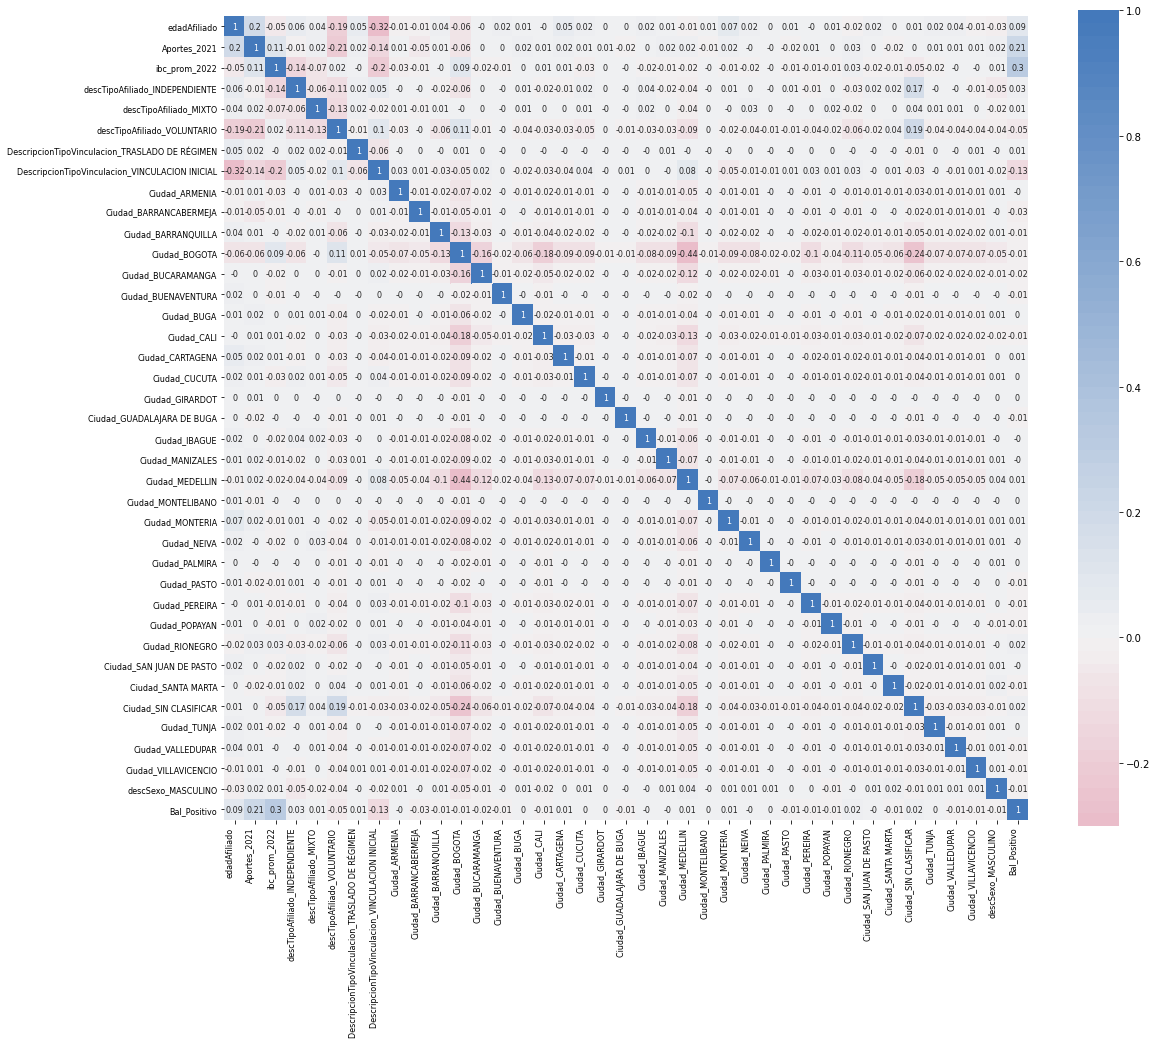

In [7]:
data = pd.concat([X,y], axis=1)
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 15))

sns.heatmap(
    data.corr().round(2),
    annot     = True,
    cbar      = True,
    annot_kws = {"size": 8},
    vmin      = -0.3,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(0, 250, n=100),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 90,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 8)

Aquí podemos observar que hay variables categóricas tales como **"ciudad"** y **"descSexo"**, que habiéndolas pasado a 
variables de tipo OneHot, prácticamente tienen una correlación muy baja con la variable Target "Bal_Positivo" y poco
podrían llegar a aportar en la generación de nuestros modelos, por lo cual las eliminaremos antes de generar los mismos,
y también por simplificación.

Repetiremos los pasos realizados anteriormente, sin considerar dichas Features mencionadas anteriormente.

In [8]:
# SEPARAMOS LAS FEATURES CATEGÓRICAS DE LAS NUMÉRICAS
cat_features = ['descTipoAfiliado', 'DescripcionTipoVinculacion']
num_features = ['edadAfiliado', 'Aportes_2021', 'ibc_prom_2022']

In [9]:
# GENERAMOS EL DF CON LAS VAR CATEGÓRICAS Y CHEQUEAMOS SUS DIMENSIONES
X_cat = df[cat_features]
print(X_cat.shape)
# GENERAMOS LAS VARIABLES DUMMIES
X_dummies = pd.get_dummies(X_cat, drop_first=True)
print(X_dummies.shape)

(114276, 2)
(114276, 5)


In [10]:
#GENERAMOS DF DE FEATURES Y VECTOR DE TARGET
X = pd.concat([df[num_features], X_dummies], axis=1)
y = df['Bal_Positivo']
print(X.shape)
print(y.shape)

(114276, 8)
(114276,)


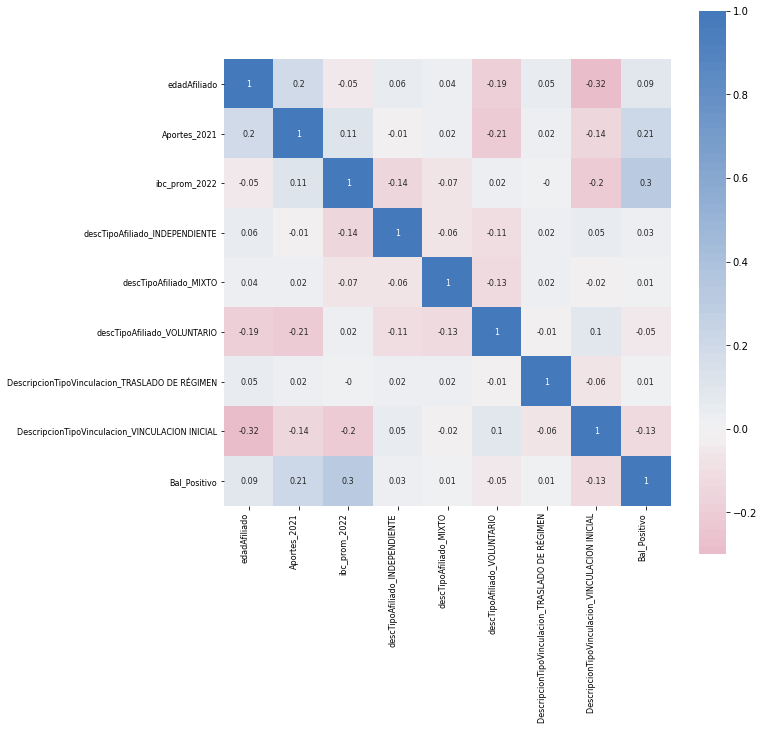

In [11]:
data = pd.concat([X,y], axis=1)
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

sns.heatmap(
    data.corr().round(2),
    annot     = True,
    cbar      = True,
    annot_kws = {"size": 8},
    vmin      = -0.3,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(0, 250, n=100),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 90,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 8)

<AxesSubplot:>

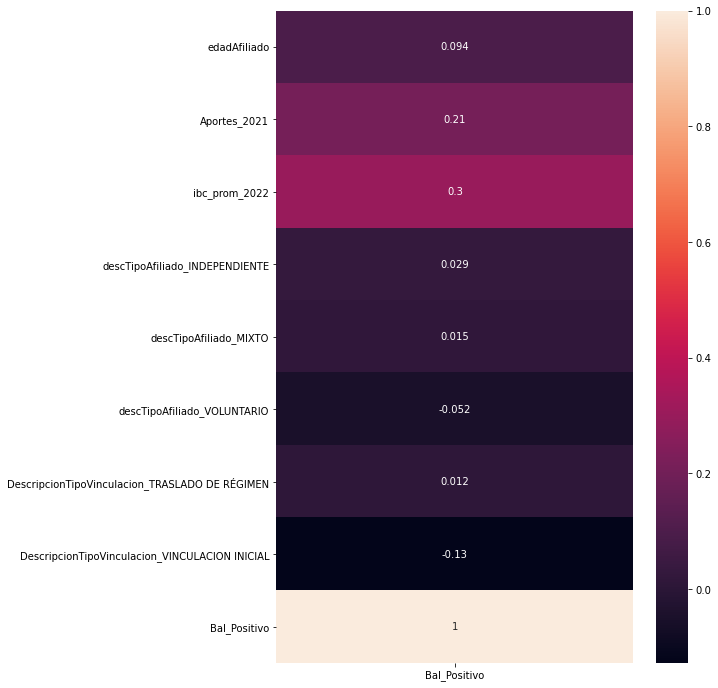

In [12]:
# ENFOCANDONOS SOLAMENTE EN LA VARIABLE TARGET Y SU CORRELACION CON LAS DIFERENTES FEATURES
plt.figure(figsize=(8,12))
sns.heatmap(data.corr()[['Bal_Positivo']], annot=True)

In [13]:
# HACEMOS UN DESCRIBE DE LOS DATOS
data.describe()

edadAfiliado   Aportes_2021  ibc_prom_2022  \
count  114276.000000  114276.000000  114276.000000   
mean       27.289063       5.595523       1.259276   
std         8.250403       3.738742       0.249829   
min        16.000000       1.000000       1.000000   
25%        21.000000       2.000000       1.000000   
50%        24.000000       5.000000       1.500000   
75%        31.000000       9.000000       1.500000   
max        62.000000      12.000000       1.500000   

       descTipoAfiliado_INDEPENDIENTE  descTipoAfiliado_MIXTO  \
count                   114276.000000           114276.000000   
mean                         0.050842                0.068685   
std                          0.219676                0.252918   
min                          0.000000                0.000000   
25%                          0.000000                0.000000   
50%                          0.000000                0.000000   
75%                          0.000000                0.000000   
max                          1.000000                1.000000   

       descTipoAfiliado_VOLUNTARIO  \
count                114276.000000   
mean                      0.190049   
std                       0.392341   
min                       0.000000   
25%                       0.000000   
50%                       0.000000   
75%                       0.000000   
max                       1.000000   

       DescripcionTipoVinculacion_TRASLADO DE RÉGIMEN  \
count                                   114276.000000   
mean                                         0.001566   
std                                          0.039547   
min                                          0.000000   
25%                                          0.000000   
50%                                          0.000000   
75%                                          0.000000   
max                                          1.000000   

       DescripcionTipoVinculacion_VINCULACION INICIAL   Bal_Positivo  
count                                   114276.000000  114276.000000  
mean                                         0.726601       0.634236  
std                                          0.445706       0.481646  
min                                          0.000000       0.000000  
25%                                          0.000000       0.000000  
50%                                          1.000000       1.000000  
75%                                          1.000000       1.000000  
max                                          1.000000       1.000000

## Visualizamos los datos con Histogramas para cada Feature.

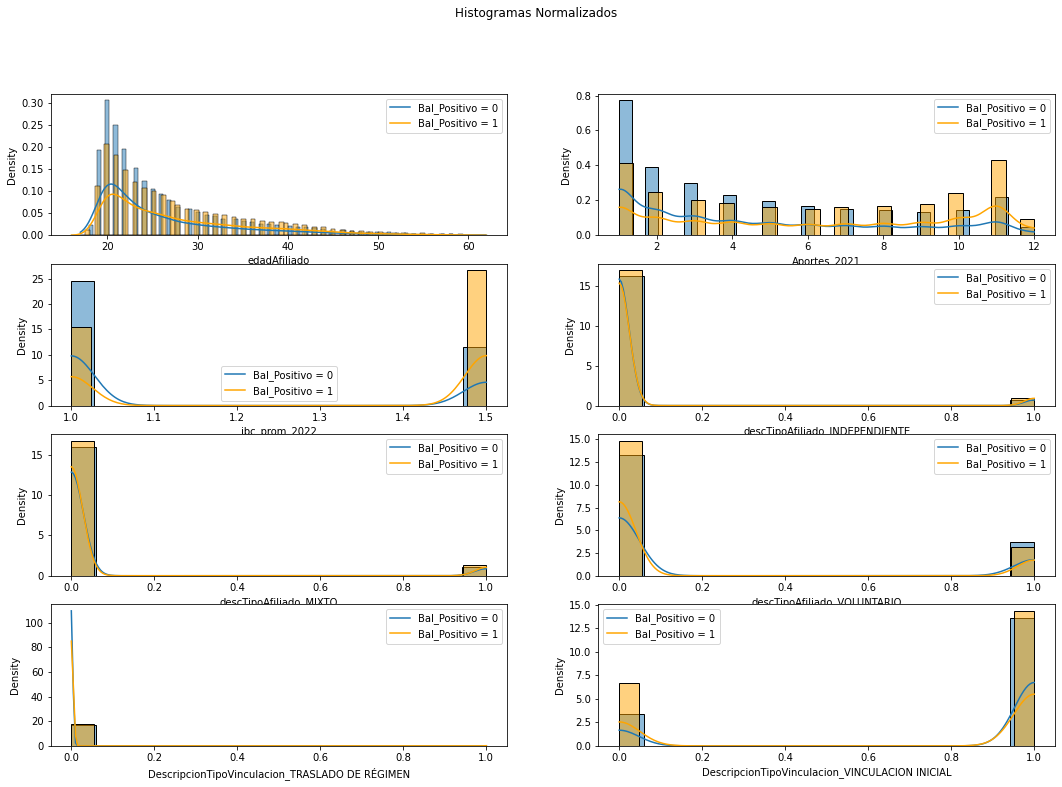

In [14]:
# HACEMOS HISTOGRAMAS DE LOS DATOS
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(18,12))
fig.suptitle('Histogramas Normalizados')
for c, ax in zip(data.columns[:-1], axes.flatten()):
    sns.histplot(data = data.loc[data['Bal_Positivo'] ==0, c].dropna(), stat='density', ax=ax, kde=True)
    sns.histplot(data = data.loc[data['Bal_Positivo'] ==1, c].dropna(), stat='density', ax=ax, kde=True, color='orange')
    ax.legend(['Bal_Positivo = 0', 'Bal_Positivo = 1'])

<a id="section_train_test"></a> 
### 4. SEPARACIÓN SETS DE TRAIN Y TEST


Separaremos los datos en Train y Test, utilizando el 25% de los mismos (default) para el set de Test.


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(85707, 8)
(28569, 8)
(85707,)
(28569,)


In [16]:
#CHEQUEAMOS COMO SE ENCUENTRAN DISTRIBUIDAS LAS CLASES DE LA VAR TARGET EN EL DATASET, CHEQUEAMOS QUE DICHA 
#DISTRIBUCIÓN SE MANTENGA EN LOS SETS DE TRAIN Y TEST
print(y.value_counts(normalize=True))
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

1    0.634236
0    0.365764
Name: Bal_Positivo, dtype: float64
1    0.634242
0    0.365758
Name: Bal_Positivo, dtype: float64
1    0.634219
0    0.365781
Name: Bal_Positivo, dtype: float64


*Debido a que el Dataset se encuentra desbalanceado en las clases y que por una conocimiento de negocio, lo que se busca es disminuir la cantidad de Falsos Positivos, la métrica principal que se buscará maximizar será **"Precision"**.
Se busca minimizar la Cantidad de Falsos Positivos, ya que un afiliado predicho como positivo falsamente, va en contra de la rentabilidad del negocio, es decir se presume como que podría aportar ingresos a la Cía, cuando en realidad no los aporta,afectando por ejemplo presupuesto de ingresos a futuro.*

<a id="section_features_numericas"></a> 
### 5. ESTANDARIZACIÓN DE LAS FEATURES NUMÉRICAS 

Estandarizamos las features numéricas utilizando la Clase StandardScaler:


In [17]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(85707, 8)
(28569, 8)
(85707,)
(28569,)


In [18]:
scaler = StandardScaler()

In [19]:
cols = ['edadAfiliado', 'Aportes_2021', 'ibc_prom_2022']
x_train_std = pd.DataFrame(scaler.fit_transform(X_train[cols]), columns=cols) #Escalamos las cols seleccionadas
X_train_orig = X_train
X_train = X_train.drop(cols, axis=1) # Borramos las cols seleccionadas del X_train
X_train_std = pd.concat([x_train_std, X_train], axis=1) # Hacemos concat de datos escalados con el resto de X_train

In [20]:
x_test_std = pd.DataFrame(scaler.transform(X_test[cols]), columns=cols) #Escalamos las cols seleccionadas
X_test_orig = X_test
X_test = X_test.drop(cols, axis=1) # Borramos las cols seleccionadas del X_test
X_test_std = pd.concat([x_test_std, X_test], axis=1) # Hacemos concat de datos escalados con el resto de X_train

In [21]:
print(X_train_std.shape)
print(X_test_std.shape)
print(y_train.shape)
print(y_test.shape)

(85707, 8)
(28569, 8)
(85707,)
(28569,)


<a id="section_modelos"></a> 
### 6. GENERACIÓN DE MODELOS


### 6.1 KNN - K Nearest Neighbors

Comenzaremos probando un modelo de Vecinos más cercanos.

En este modelo tendremos como hiperparámetro principales los siguientes:
 - n_neighbors: el número de vecinos más cercanos.
 - weights: la medida del peso dado a los K vecinos (uniform or distance)
 - parámetro p: que define el tipo de distancia con el que se calculan los vecinos más cercanos:
 
 (1 - Manhattan; 2 - Euclidean)


### 6.1.1 Ajustaremos los hiperparámetros utilizando la métrica "accuracy"

In [22]:
params = [ 
    {'n_neighbors': range(1,30),
     'weights': ['uniform', 'distance'],
     'p':[1,2]}     
] 

In [23]:
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=19)

In [24]:
knn = KNeighborsClassifier()

In [25]:
grid = GridSearchCV(knn, param_grid=params, cv=folds, scoring= 'accuracy', n_jobs=-1)

In [26]:
# Entrenamos el modelo
grid.fit(X_train_std, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=19, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'n_neighbors': range(1, 30), 'p': [1, 2],
                          'weights': ['uniform', 'distance']}],
             scoring='accuracy')

Generamos dos funciones:
- **get_metrics_prevfitted**: Produce un DF con las métricas seleccionadas para evaluar un modelo y un array con 
las probabilidades de predicción para cada etiqueta. Requiere entrenamiento previo.

- **get_roc_auc**: Plotea la curva ROC y genera un DF con las variables tpr, fpr ty thr(threshold) que utilizaremos más adelante.

In [28]:
def get_metrics_prevfitted(model, X_test, y_test, name_model):
    metrics = {}
    y_pred_test = model.predict(X_test)
    y_pred_proba_mod = model.predict_proba(X_test)    
    confus_mat = plot_confusion_matrix(model, X_test, y_test)
    print('Model Best Estimator: ', model.best_estimator_)
    print('Model Best Score: ', model.best_score_)
    print('Model Best Params: ', model.best_params_)
    metrics['Accuracy'] = round(accuracy_score(y_test, y_pred_test),2)
    metrics['Error_Classif'] =  round(1 - metrics['Accuracy'],2)
    metrics['Recall'] = round(recall_score(y_test, y_pred_test),2)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()
    spc = tn/(tn+fp)
    metrics['Specificity'] = round(spc,2)
    metrics['Precision'] = round(precision_score(y_test, y_pred_test),2)
    metrics['f1_score'] = round(f1_score(y_test, y_pred_test),2)
    fpr, tpr, thr = roc_curve(y_test, y_pred_proba_mod[:,1], drop_intermediate=False)
    metrics['AUC'] = round(auc(fpr, tpr),3)
    df_mod = pd.DataFrame(metrics, index = [name_model])
    display(df_mod)
    return y_pred_proba_mod, df_mod

In [29]:
def get_roc_auc(y_test, y_pred_proba, name_model):
    fpr, tpr, thr = roc_curve(y_test, y_pred_proba[:,1], drop_intermediate=False)
    df_roc = pd.DataFrame(dict(fpr_=fpr, tpr_=tpr, thr_= thr))
    AUC = round(auc(fpr, tpr),3)
    plt.axis([0,1.01, 0,1.01])
    plt.xlabel('1-specificity')
    plt.ylabel('TPR / sensitivity')
    plt.title('ROC Curve - ' + name_model + ' (AUC= ' + str(AUC) + ')')
    plt.plot(df_roc['fpr_'], df_roc['tpr_'])
    plt.plot(np.arange(0,1, step=0.01), np.arange(0,1, step=0.01))
    plt.show()
    return df_roc

Model Best Estimator:  KNeighborsClassifier(n_neighbors=29, p=1)
Model Best Score:  0.6844364922094577
Model Best Params:  {'n_neighbors': 29, 'p': 1, 'weights': 'uniform'}


Accuracy  Error_Classif  Recall  Specificity  Precision  \
KNN_Hyp_Met_Acc      0.69           0.31    0.83         0.44       0.72   

                 f1_score    AUC  
KNN_Hyp_Met_Acc      0.77  0.708

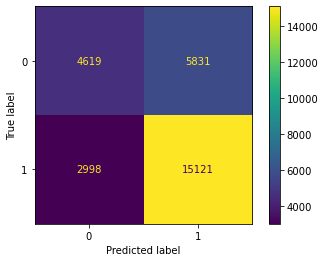

In [30]:
y_pred_proba_mod0, df_mod0 = get_metrics_prevfitted(grid, X_test_std, y_test, 'KNN_Hyp_Met_Acc')

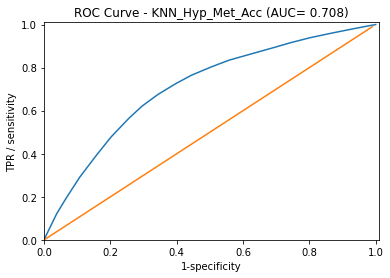

fpr_      tpr_      thr_
0  0.000000  0.000000  2.000000
1  0.000287  0.002263  1.000000
2  0.006029  0.021028  0.965517
3  0.023541  0.076384  0.931034
4  0.037703  0.121144  0.896552

In [31]:
rocm0 = get_roc_auc(y_test, y_pred_proba_mod0, 'KNN_Hyp_Met_Acc')
display(rocm0.head())

### 6.1.2 Ajustaremos los hiperparámetros utilizando la métrica "precision"

In [32]:
grid1 = GridSearchCV(knn, param_grid=params, cv=folds, scoring= 'precision', n_jobs=-1)

In [33]:
# Entrenamos el modelo
grid1.fit(X_train_std, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=19, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'n_neighbors': range(1, 30), 'p': [1, 2],
                          'weights': ['uniform', 'distance']}],
             scoring='precision')

Model Best Estimator:  KNeighborsClassifier(n_neighbors=18)
Model Best Score:  0.7261152732093741
Model Best Params:  {'n_neighbors': 18, 'p': 2, 'weights': 'uniform'}


Accuracy  Error_Classif  Recall  Specificity  Precision  \
KNN_Hyp_Met_Precis      0.68           0.32    0.81         0.47       0.73   

                    f1_score    AUC  
KNN_Hyp_Met_Precis      0.76  0.697

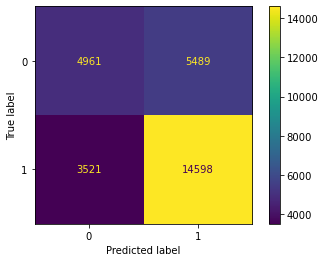

In [34]:
y_pred_proba_mod1, df_mod1 = get_metrics_prevfitted(grid1, X_test_std, y_test, 'KNN_Hyp_Met_Precis')

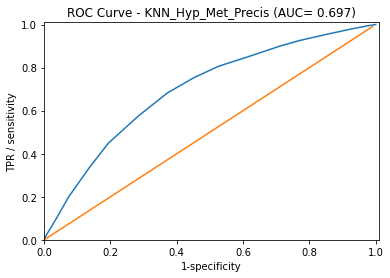

fpr_      tpr_      thr_
0  0.000000  0.000000  2.000000
1  0.004976  0.018103  1.000000
2  0.037416  0.101054  0.944444

In [35]:
rocm1 = get_roc_auc(y_test, y_pred_proba_mod1, 'KNN_Hyp_Met_Precis')
rocm1.head(3)

### 6.2 LOGISTIC REGRESSION

### 6.2.1 LOGISTIC REGRESSION (Utilizando Accuracy para calcular los hiperparámetros)

In [36]:
params_lr = [ 
    {'C': [np.linspace(0.1,1,10),10,100,1000,10000,100000,1000000],
     'penalty': ['l1', 'l2', 'elasticnet'],
     'l1_ratio': [np.linspace(0.1,1,10)],
     'solver': ['saga'],
     'max_iter': [200]
    }     
] 

In [37]:
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=19)

In [38]:
log_reg = LogisticRegression()

In [39]:
grid2_lr = GridSearchCV(log_reg, param_grid=params_lr, cv=folds, scoring= 'accuracy', n_jobs=-1)

In [40]:
grid2_lr.fit(X_train_std, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=19, shuffle=True),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': [array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                10, 100, 1000, 10000, 100000, 1000000],
                          'l1_ratio': [array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])],
                          'max_iter': [200],
                          'penalty': ['l1', 'l2', 'elasticnet'],
                          'solver': ['saga']}],
             scoring='accuracy')

Model Best Estimator:  LogisticRegression(C=10,
                   l1_ratio=array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                   max_iter=200, penalty='l1', solver='saga')
Model Best Score:  0.6943423468744563
Model Best Params:  {'C': 10, 'l1_ratio': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), 'max_iter': 200, 'penalty': 'l1', 'solver': 'saga'}


Accuracy  Error_Classif  Recall  Specificity  Precision  \
LOGREG_Hyp_Met_Acc       0.7            0.3    0.84         0.46       0.73   

                    f1_score    AUC  
LOGREG_Hyp_Met_Acc      0.78  0.726

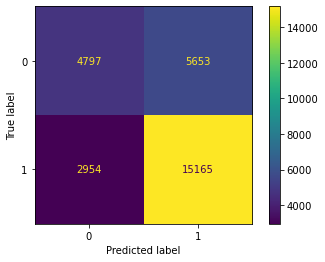

In [41]:
y_pred_proba_mod2, df_mod2 = get_metrics_prevfitted(grid2_lr, X_test_std, y_test, 'LOGREG_Hyp_Met_Acc')

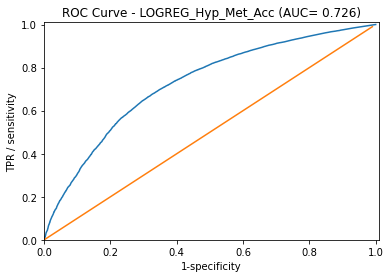

fpr_      tpr_      thr_
0   0.0  0.000000  1.964896
1   0.0  0.000055  0.964896
2   0.0  0.000110  0.956701

In [42]:
rocm2 = get_roc_auc(y_test, y_pred_proba_mod2, 'LOGREG_Hyp_Met_Acc')
rocm2.head(3)

### 6.2.2 LOGISTIC REGRESSION (Utilizando Precision para calcular los hiperparámetros)

In [43]:
grid3_lr = GridSearchCV(log_reg, param_grid=params_lr, cv=folds, scoring= 'precision', n_jobs=-1)

In [44]:
grid3_lr.fit(X_train_std, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=19, shuffle=True),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': [array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                10, 100, 1000, 10000, 100000, 1000000],
                          'l1_ratio': [array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])],
                          'max_iter': [200],
                          'penalty': ['l1', 'l2', 'elasticnet'],
                          'solver': ['saga']}],
             scoring='precision')

Model Best Estimator:  LogisticRegression(C=100000,
                   l1_ratio=array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                   max_iter=200, penalty='l1', solver='saga')
Model Best Score:  0.7255498998632494
Model Best Params:  {'C': 100000, 'l1_ratio': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), 'max_iter': 200, 'penalty': 'l1', 'solver': 'saga'}


Accuracy  Error_Classif  Recall  Specificity  \
LOGREG_Hyp_Met_Precis       0.7            0.3    0.84         0.46   

                       Precision  f1_score    AUC  
LOGREG_Hyp_Met_Precis       0.73      0.78  0.726

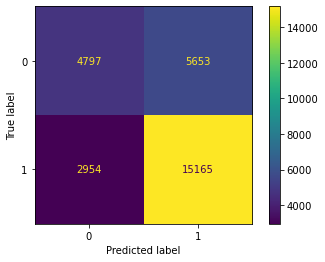

In [45]:
y_pred_proba_mod3, df_mod3 = get_metrics_prevfitted(grid3_lr, X_test_std, y_test, 'LOGREG_Hyp_Met_Precis')

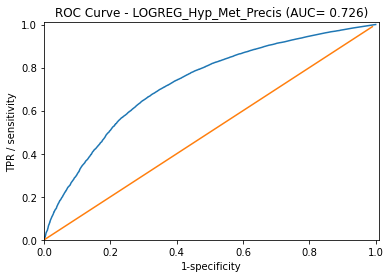

fpr_      tpr_      thr_
0   0.0  0.000000  1.965058
1   0.0  0.000055  0.965058
2   0.0  0.000110  0.956705

In [46]:
rocm3 = get_roc_auc(y_test, y_pred_proba_mod3, 'LOGREG_Hyp_Met_Precis')
rocm3.head(3)

### 6.3 NAIVE BAYES

### 6.3.1 NAIVE BAYES - Gaussian (Todas las variables, con variables numéricas estandarizadas)

Modificamos levemente la función generada anteriormente **get_metrics_prevfitted**. 
- **fit_get_metrics**: Produce un DF con las métricas seleccionadas para evaluar un modelo y un array con 
las probabilidades de predicción para cada etiqueta. Realiza entrenamiento y evaluación del modelo.

In [47]:
def fit_get_metrics(model, X_train, X_test, y_train, y_test, name_model):
    metrics = {}
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    y_pred_proba_mod = model.predict_proba(X_test)    
    confus_mat = plot_confusion_matrix(model, X_test, y_test)
    metrics['Accuracy'] = round(accuracy_score(y_test, y_pred_test),2)
    metrics['Error_Classif'] =  round(1 - metrics['Accuracy'],2)
    metrics['Recall'] = round(recall_score(y_test, y_pred_test),2)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()
    spc = tn/(tn+fp)
    metrics['Specificity'] = round(spc,2)
    metrics['Precision'] = round(precision_score(y_test, y_pred_test),2)
    metrics['f1_score'] = round(f1_score(y_test, y_pred_test),2)
    fpr, tpr, thr = roc_curve(y_test, y_pred_proba_mod[:,1], drop_intermediate=False)
    metrics['AUC'] = round(auc(fpr, tpr),3)
    df_mod = pd.DataFrame(metrics, index = [name_model])
    display(df_mod)
    return y_pred_proba_mod, df_mod

In [48]:
mod4_gnb = GaussianNB()

Accuracy  Error_Classif  Recall  Specificity  Precision  \
GAUSSNB-NumFeatStd      0.64           0.36    0.64         0.65       0.76   

                    f1_score    AUC  
GAUSSNB-NumFeatStd       0.7  0.695

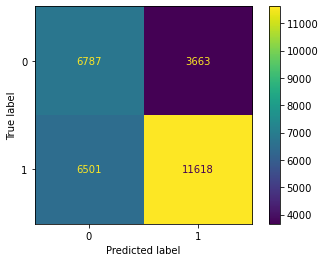

In [49]:
y_pred_proba_mod4, df_mod4 = fit_get_metrics(mod4_gnb, X_train_std, X_test_std, y_train, y_test, 'GAUSSNB-NumFeatStd') 

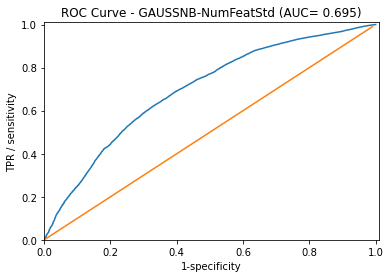

fpr_      tpr_      thr_
0  0.000000  0.000000  2.000000
1  0.000957  0.001380  1.000000
2  0.000957  0.001435  0.998693

In [50]:
rocm4 = get_roc_auc(y_test, y_pred_proba_mod4, 'GAUSSNB-NumFeatStd')
rocm4.head(3)

### 6.3.2 NAIVE BAYES - Gaussian (Todas las variables, con variables numéricas sin estandarizar)

In [51]:
mod5_gnb = GaussianNB()

Accuracy  Error_Classif  Recall  Specificity  Precision  \
GAUSSNB-NumFeatNOStd      0.64           0.36    0.64         0.65       0.76   

                      f1_score    AUC  
GAUSSNB-NumFeatNOStd       0.7  0.695

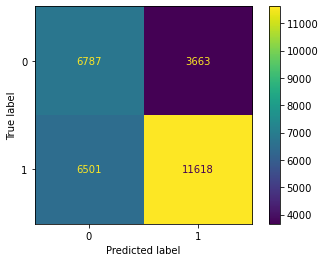

In [52]:
y_pred_proba_mod5, df_mod5= fit_get_metrics(mod5_gnb, X_train_orig, X_test_orig, y_train, y_test, 'GAUSSNB-NumFeatNOStd')

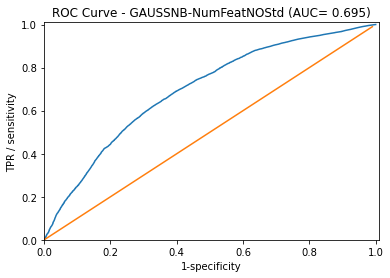

fpr_      tpr_      thr_
0  0.000000  0.000000  2.000000
1  0.000957  0.001380  1.000000
2  0.000957  0.001435  0.998693

In [53]:
rocm5 = get_roc_auc(y_test, y_pred_proba_mod5, 'GAUSSNB-NumFeatNOStd')
rocm5.head(3)

### 6.3.3 NAIVE BAYES - Multinomial (Todas las variables, con variables numéricas sin estandarizar)

In [54]:
mod6_multNB = MultinomialNB()

Accuracy  Error_Classif  Recall  Specificity  Precision  \
MULTNB-NumFeatNOStd      0.62           0.38    0.75         0.39       0.68   

                     f1_score   AUC  
MULTNB-NumFeatNOStd      0.71  0.62

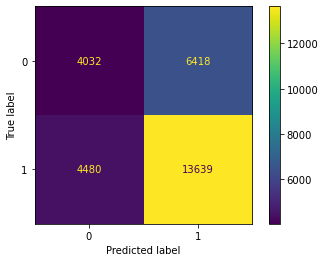

In [55]:
y_pred_proba_mod6, df_mod6 = fit_get_metrics(mod6_multNB, X_train_orig, X_test_orig, y_train, y_test, 'MULTNB-NumFeatNOStd')

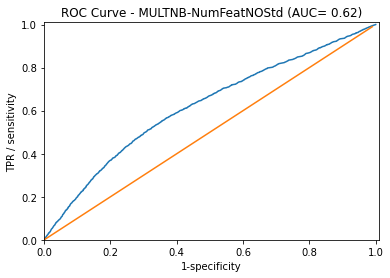

fpr_      tpr_      thr_
0   0.0  0.000000  1.934894
1   0.0  0.000055  0.934894
2   0.0  0.000110  0.933365

In [56]:
rocm6 = get_roc_auc(y_test, y_pred_proba_mod6, 'MULTNB-NumFeatNOStd')
rocm6.head(3)

### 6.3.4 NAIVE BAYES - Gaussian (Solo variables numéricas sin estandarizar)

In [57]:
X_train_num = X_train_orig[['edadAfiliado', 'Aportes_2021', 'ibc_prom_2022']]
X_test_num = X_test_orig[['edadAfiliado', 'Aportes_2021', 'ibc_prom_2022']] 
print(X_train_num.shape)
print(X_test_num.shape)

(85707, 3)
(28569, 3)


In [58]:
mod7_gnb = GaussianNB()

Accuracy  Error_Classif  Recall  Specificity  Precision  \
GNB-OnlyNumFeatNOStd       0.7            0.3    0.82         0.49       0.73   

                      f1_score   AUC  
GNB-OnlyNumFeatNOStd      0.77  0.72

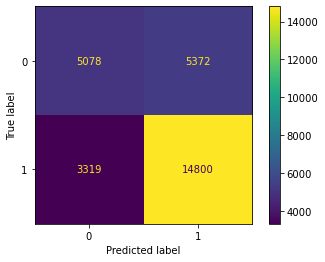

In [59]:
y_pred_proba_mod7, df_mod7 = fit_get_metrics(mod7_gnb, X_train_num, X_test_num, y_train, y_test, 'GNB-OnlyNumFeatNOStd')

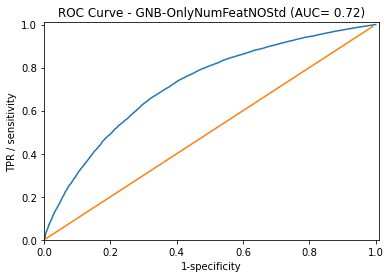

fpr_      tpr_      thr_
0   0.0  0.000000  1.981586
1   0.0  0.000055  0.981586
2   0.0  0.000110  0.977675

In [60]:
rocm7 = get_roc_auc(y_test, y_pred_proba_mod7, 'GNB-OnlyNumFeatNOStd')
rocm7.head(3)

### 6.3.5 NAIVE BAYES - Multinomial (Solo variables categóricas)

In [61]:
X_train_cat = X_train_orig.drop(columns=['edadAfiliado', 'Aportes_2021', 'ibc_prom_2022'], axis=1)
X_test_cat = X_test_orig.drop(columns=['edadAfiliado', 'Aportes_2021', 'ibc_prom_2022'], axis=1) 
print(X_train_cat.shape)
print(X_test_cat.shape)

(85707, 5)
(28569, 5)


In [62]:
mod8_multNB = MultinomialNB()

Accuracy  Error_Classif  Recall  Specificity  \
MULTINOMIALNB-OnlyCatFeat      0.63           0.37     1.0          0.0   

                           Precision  f1_score    AUC  
MULTINOMIALNB-OnlyCatFeat       0.63      0.78  0.558

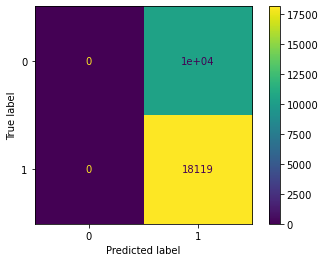

In [63]:
y_pred_proba_mod8, df_mod8 = fit_get_metrics(mod8_multNB, X_train_cat, X_test_cat, y_train, y_test, 'MULTINOMIALNB-OnlyCatFeat')

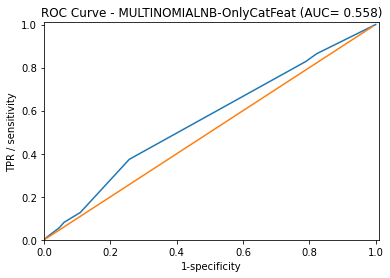

fpr_      tpr_      thr_
0  0.000000  0.000000  1.870797
1  0.000096  0.000221  0.870797
2  0.000191  0.000662  0.849003

In [64]:
rocm8 = get_roc_auc(y_test, y_pred_proba_mod8, 'MULTINOMIALNB-OnlyCatFeat')
rocm8.head(3)

### 6.3.6 NAIVE BAYES - Categorical (Solo variables categóricas)

In [65]:
mod9_catnb  = CategoricalNB()

Accuracy  Error_Classif  Recall  Specificity  \
CATEGORICALNB-OnlyCatFeat      0.63           0.37     1.0          0.0   

                           Precision  f1_score    AUC  
CATEGORICALNB-OnlyCatFeat       0.63      0.78  0.571

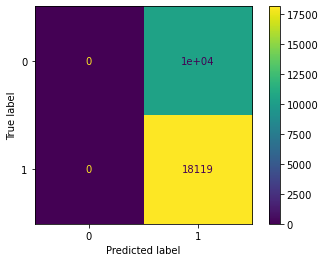

In [66]:
y_pred_proba_mod9, df_mod9 = fit_get_metrics(mod9_catnb, X_train_cat, X_test_cat, y_train, y_test, 'CATEGORICALNB-OnlyCatFeat')

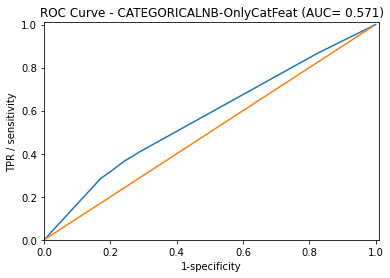

fpr_      tpr_      thr_
0  0.000000  0.000000  1.896817
1  0.000096  0.000221  0.896817
2  0.000191  0.000662  0.878060

In [67]:
rocm9 = get_roc_auc(y_test, y_pred_proba_mod9, 'CATEGORICALNB-OnlyCatFeat')
rocm9.head(3)

### 6.3.7 NAIVE BAYES - Gaussian - Multinomial (POr separado variables numéricas y categóricas)

In [68]:
clases = mod7_gnb.classes_

y_predcn=[]
pred_proba = []
for i in range(0,len(y_test)):
    proba=(y_pred_proba_mod7[i] * y_pred_proba_mod8[i])/(y_pred_proba_mod7[i] * y_pred_proba_mod8[i]).sum()
    y_predcn.append(clases[np.argmax(proba)])
    pred_proba.append(proba)
y_predcn=np.array(y_predcn)

name_model = 'Mix GAUSSIANNB - MULTINOMIALNB'
metrics = {}
metrics['Accuracy'] = round(accuracy_score(y_test, y_predcn),2)
metrics['Error_Classif'] =  round(1 - metrics['Accuracy'],2)
metrics['Recall'] = round(recall_score(y_test, y_predcn),2)
tn, fp, fn, tp = confusion_matrix(y_test, y_predcn).ravel()
spc = tn/(tn+fp)
metrics['Specificity'] = round(spc,2)
metrics['Precision'] = round(precision_score(y_test, y_predcn),2)
metrics['f1_score'] = round(f1_score(y_test, y_predcn),2)
y_pred_proba_mod10_GMultNB = np.reshape(pred_proba,(-1,2))
fpr, tpr, thr = roc_curve(y_test, y_pred_proba_mod10_GMultNB[:,1], drop_intermediate=False)
metrics['AUC'] = round(auc(fpr, tpr),3)
df_mod10 = pd.DataFrame(metrics, index = [name_model])
display(df_mod10)

Accuracy  Error_Classif  Recall  Specificity  \
Mix GAUSSIANNB - MULTINOMIALNB      0.68           0.32    0.92         0.27   

                                Precision  f1_score    AUC  
Mix GAUSSIANNB - MULTINOMIALNB       0.69      0.79  0.722

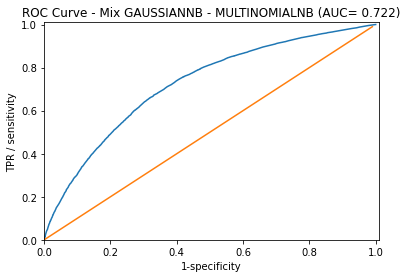

fpr_      tpr_      thr_
0   0.0  0.000000  1.991630
1   0.0  0.000055  0.991630
2   0.0  0.000110  0.991548

In [69]:
rocm10 = get_roc_auc(y_test, y_pred_proba_mod10_GMultNB, 'Mix GAUSSIANNB - MULTINOMIALNB')
rocm10.head(3)

<a id="section_comparacion_modelos"></a> 
### 7. COMPARACIÓN DE LOS MODELOS GENERADOS


Haremos un gráfico resumen de todos los modelos, del mismo obtendremos los dos mejores, los graficaremos
y buscaremos el valor de umbral o threshold para tener una FPr <= 0.25, para calcular nuevamente las métricas y elegir el mejor modelo con mejor desempeño.

### 7. 1 Gráfico con todos los modelos generados

Compararemos los gráficos utilizando Matplotlib y Plotly. Previo a esto generamos un DF con el resumen de las
métricas de todos los modelos generados.

In [70]:
dfs = [df_mod0, df_mod1, df_mod2, df_mod3, df_mod4, df_mod5,
      df_mod6, df_mod7, df_mod8, df_mod9, df_mod10]
df_resumen = pd.concat(dfs, axis=0)
df_resumen

Accuracy  Error_Classif  Recall  Specificity  \
KNN_Hyp_Met_Acc                     0.69           0.31    0.83         0.44   
KNN_Hyp_Met_Precis                  0.68           0.32    0.81         0.47   
LOGREG_Hyp_Met_Acc                  0.70           0.30    0.84         0.46   
LOGREG_Hyp_Met_Precis               0.70           0.30    0.84         0.46   
GAUSSNB-NumFeatStd                  0.64           0.36    0.64         0.65   
GAUSSNB-NumFeatNOStd                0.64           0.36    0.64         0.65   
MULTNB-NumFeatNOStd                 0.62           0.38    0.75         0.39   
GNB-OnlyNumFeatNOStd                0.70           0.30    0.82         0.49   
MULTINOMIALNB-OnlyCatFeat           0.63           0.37    1.00         0.00   
CATEGORICALNB-OnlyCatFeat           0.63           0.37    1.00         0.00   
Mix GAUSSIANNB - MULTINOMIALNB      0.68           0.32    0.92         0.27   

                                Precision  f1_score    AUC  
KNN_Hyp_Met_Acc                      0.72      0.77  0.708  
KNN_Hyp_Met_Precis                   0.73      0.76  0.697  
LOGREG_Hyp_Met_Acc                   0.73      0.78  0.726  
LOGREG_Hyp_Met_Precis                0.73      0.78  0.726  
GAUSSNB-NumFeatStd                   0.76      0.70  0.695  
GAUSSNB-NumFeatNOStd                 0.76      0.70  0.695  
MULTNB-NumFeatNOStd                  0.68      0.71  0.620  
GNB-OnlyNumFeatNOStd                 0.73      0.77  0.720  
MULTINOMIALNB-OnlyCatFeat            0.63      0.78  0.558  
CATEGORICALNB-OnlyCatFeat            0.63      0.78  0.571  
Mix GAUSSIANNB - MULTINOMIALNB       0.69      0.79  0.722

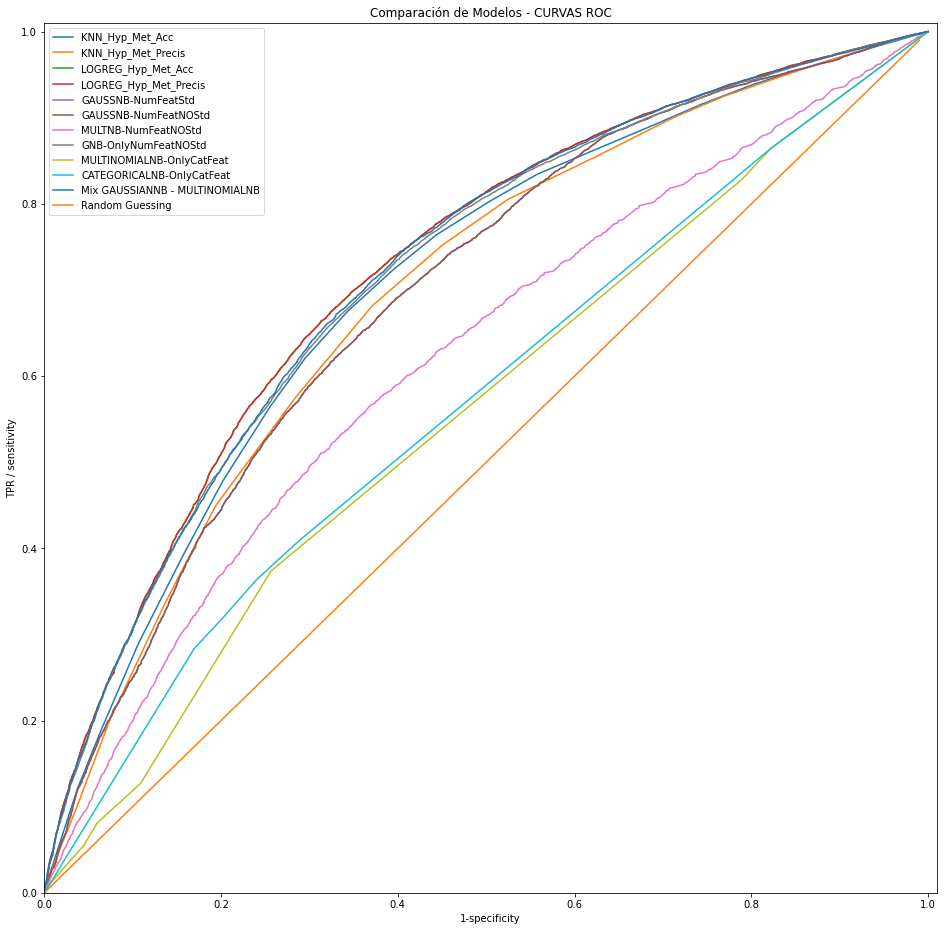

In [71]:
plt.figure(figsize=(16,16))
plt.axis([0,1.01, 0,1.01])
plt.xlabel('1-specificity')
plt.ylabel('TPR / sensitivity')
plt.title('Comparación de Modelos - CURVAS ROC')
plt.plot(rocm0['fpr_'], rocm0['tpr_'])
plt.plot(rocm1['fpr_'], rocm1['tpr_'])
plt.plot(rocm2['fpr_'], rocm2['tpr_'])
plt.plot(rocm3['fpr_'], rocm3['tpr_'])
plt.plot(rocm4['fpr_'], rocm4['tpr_'])
plt.plot(rocm5['fpr_'], rocm5['tpr_'])
plt.plot(rocm6['fpr_'], rocm6['tpr_'])
plt.plot(rocm7['fpr_'], rocm7['tpr_'])
plt.plot(rocm8['fpr_'], rocm8['tpr_'])
plt.plot(rocm9['fpr_'], rocm9['tpr_'])
plt.plot(rocm10['fpr_'], rocm10['tpr_'])
plt.plot(np.arange(0,1, step=0.01), np.arange(0,1, step=0.01))
plt.legend(['KNN_Hyp_Met_Acc', 'KNN_Hyp_Met_Precis', 'LOGREG_Hyp_Met_Acc',
           'LOGREG_Hyp_Met_Precis', 'GAUSSNB-NumFeatStd', 
            'GAUSSNB-NumFeatNOStd', 'MULTNB-NumFeatNOStd',
            'GNB-OnlyNumFeatNOStd', 'MULTINOMIALNB-OnlyCatFeat',
            'CATEGORICALNB-OnlyCatFeat', 'Mix GAUSSIANNB - MULTINOMIALNB', 'Random Guessing' 
           ])
plt.show()

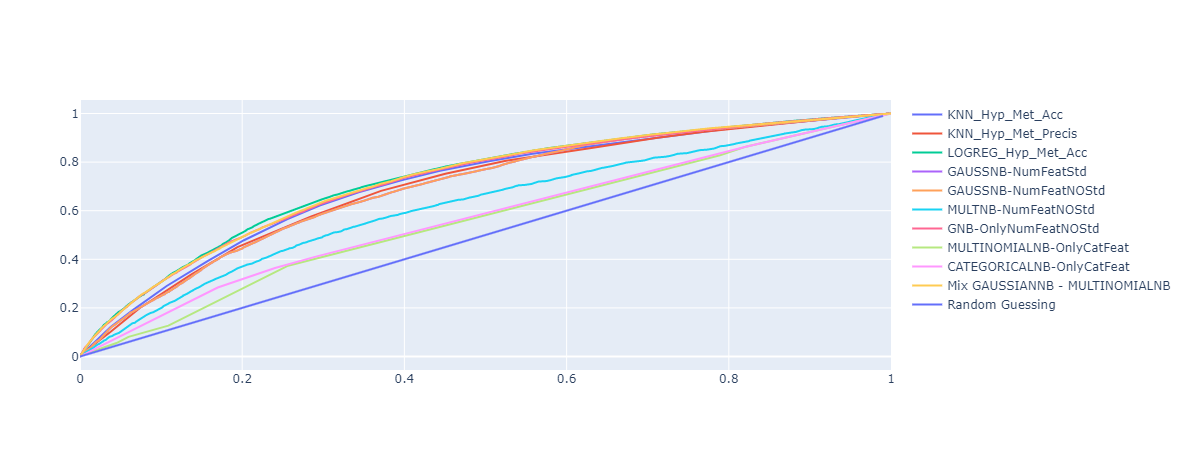

In [72]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=rocm0['fpr_'], 
                         y=rocm0['tpr_'],
                        mode='lines',
                        name='KNN_Hyp_Met_Acc'))
fig.add_trace(go.Scatter(x=rocm1['fpr_'], 
                         y=rocm1['tpr_'],
                        mode='lines',
                        name='KNN_Hyp_Met_Precis'))
fig.add_trace(go.Scatter(x=rocm2['fpr_'], 
                         y=rocm2['tpr_'],
                        mode='lines',
                        name='LOGREG_Hyp_Met_Acc'))
#fig.add_trace(go.Scatter(x=rocm3['fpr_'], 
#                         y=rocm3['tpr_'],
#                        mode='lines',
#                        name='LOGREG_Hyp_Met_Precis'))
fig.add_trace(go.Scatter(x=rocm4['fpr_'], 
                         y=rocm4['tpr_'],
                        mode='lines',
                        name='GAUSSNB-NumFeatStd'))
fig.add_trace(go.Scatter(x=rocm5['fpr_'], 
                         y=rocm5['tpr_'],
                        mode='lines',
                        name='GAUSSNB-NumFeatNOStd'))
fig.add_trace(go.Scatter(x=rocm6['fpr_'], 
                         y=rocm6['tpr_'],
                        mode='lines',
                        name='MULTNB-NumFeatNOStd'))
fig.add_trace(go.Scatter(x=rocm7['fpr_'], 
                         y=rocm7['tpr_'],
                        mode='lines',
                        name='GNB-OnlyNumFeatNOStd'))
fig.add_trace(go.Scatter(x=rocm8['fpr_'], 
                         y=rocm8['tpr_'],
                        mode='lines',
                        name='MULTINOMIALNB-OnlyCatFeat'))
fig.add_trace(go.Scatter(x=rocm9['fpr_'], 
                         y=rocm9['tpr_'],
                        mode='lines',
                        name='CATEGORICALNB-OnlyCatFeat'))
fig.add_trace(go.Scatter(x=rocm10['fpr_'], 
                         y=rocm10['tpr_'],
                        mode='lines',
                        name='Mix GAUSSIANNB - MULTINOMIALNB'))
fig.add_trace(go.Scatter(x=np.arange(0,1, step=0.01), 
                         y=np.arange(0,1, step=0.01),
                        mode='lines',
                        name='Random Guessing',
                        ))
fig.show()

Cabe aclarar que en el caso anterior no graficamos el modelo de Rg Logist ajustando Hyperparámetros por Precision,
debido a que el modelo es igual al ajustado por Accuracy:
**En la competencia de modelos, los dos modelos que tienen una mejor performance, en base a 
las métricas utilizadas, son los siguientes:**

In [73]:
display(df_mod2)
display(df_mod7)

Accuracy  Error_Classif  Recall  Specificity  Precision  \
LOGREG_Hyp_Met_Acc       0.7            0.3    0.84         0.46       0.73   

                    f1_score    AUC  
LOGREG_Hyp_Met_Acc      0.78  0.726

Accuracy  Error_Classif  Recall  Specificity  Precision  \
GNB-OnlyNumFeatNOStd       0.7            0.3    0.82         0.49       0.73   

                      f1_score   AUC  
GNB-OnlyNumFeatNOStd      0.77  0.72

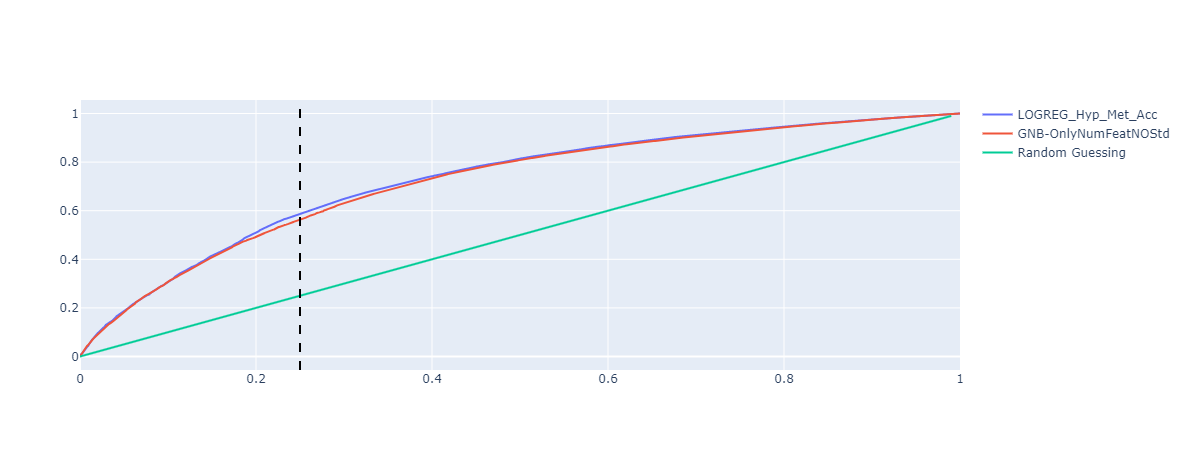

In [74]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=rocm2['fpr_'], 
                         y=rocm2['tpr_'],
                        mode='lines',
                        name='LOGREG_Hyp_Met_Acc'))

fig.add_trace(go.Scatter(x=rocm7['fpr_'], 
                         y=rocm7['tpr_'],
                        mode='lines',
                        name='GNB-OnlyNumFeatNOStd'))
fig.add_trace(go.Scatter(x=np.arange(0,1, step=0.01), 
                         y=np.arange(0,1, step=0.01),
                        mode='lines',
                        name='Random Guessing',
                        ))
fig.add_vline(x=0.25, line_width=2, line_dash="dash", line_color="black")
fig.show()

Buscamos en los DataFrames de los modelos respectivos, los valores de Umbral o Threshold correspondientes a 
una Tasa FPr = 0.25. Una vez detectados dichos valores, cambiamos los umbrales para ambos modelos y recalculamos
las métricas.

In [75]:
indices_df_m2_lr = rocm2.loc[np.round(rocm2['fpr_'],2) ==0.25]
indices_df_m2_lr.loc[indices_df_m2_lr['tpr_']==indices_df_m2_lr['tpr_'].max()]

fpr_      tpr_      thr_
2188  0.254928  0.593024  0.676115

In [76]:
indices_df_m7_GNB = rocm7.loc[np.round(rocm7['fpr_'],2) ==0.25]
indices_df_m7_GNB.loc[indices_df_m7_GNB['tpr_']==indices_df_m7_GNB['tpr_'].max()]

fpr_      tpr_      thr_
618  0.254833  0.569016  0.682244

## Cambio del valor de Threshold o Umbral.

Si queremos mejorar la Precisión de un Modelo, modificando el valor de Threshold (que por defecto es 0.5), debemos tener en cuenta que para disminuir la "fpr" (false positive rate) deberíamos aumentar el valor de dicho Umbral "Thr", también aumentando lo opuesto, es decir la "fnr" (false negative rate), este ultimo impactará em otras métricas pero no tendrá influencia en la "Precisión".
Por cuestiones de negocio decidimos tener una fpr máxima=0.25 y en base a este valor calcular el valor de Thr obtenido por la curva ROC para esa tasa de fpr, modificarlo en nuestro modelo y recalcular las métricas para ver el cambio de rendimiento.

**Cambiamos el Threshold del modelo de Regresión Logística utilizando la librería binarize.**

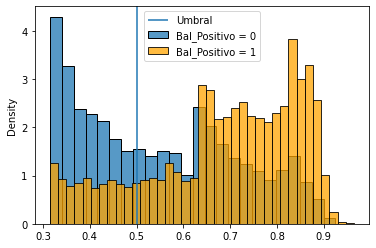

In [77]:
# Histograma de probabilidades
sns.histplot(data = grid2_lr.predict_proba(X_test_std[y_test==0])[:,1], stat = 'density')
sns.histplot(data = grid2_lr.predict_proba(X_test_std[y_test==1])[:,1], stat = 'density', color = 'orange')
ylim = plt.ylim()
plt.vlines(0.5, ylim[0], ylim[1])
plt.ylim(ylim)
plt.legend(['Umbral', 'Bal_Positivo = 0', 'Bal_Positivo = 1'])

*Las distribuciones de las predicciones de ambos datos no se encuentran lo suficientemente alejadas.*

In [78]:
y_pred_logit = binarize(y_pred_proba_mod2 , 0.68)[:,1]

**Recalculamos las métricas del modelo de Regresión Logística.**

Accuracy  Error_Classif  Recall  Specificity  \
LOGREG_Hyp_Met_Acc (Thr=0.68)      0.64           0.36    0.58         0.75   

                               Precision  f1_score  
LOGREG_Hyp_Met_Acc (Thr=0.68)        0.8      0.68

Confusion Matrix


Text(0.5, 15.0, 'Predichos')

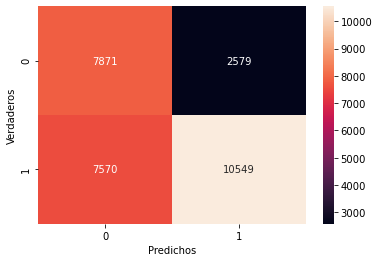

In [79]:
name_model = 'LOGREG_Hyp_Met_Acc (Thr=0.68)'
metrics = {}
metrics['Accuracy'] = round(accuracy_score(y_test, y_pred_logit),2)
metrics['Error_Classif'] =  round(1 - metrics['Accuracy'],2)
metrics['Recall'] = round(recall_score(y_test, y_pred_logit),2)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_logit).ravel()
spc = tn/(tn+fp)
metrics['Specificity'] = round(spc,2)
metrics['Precision'] = round(precision_score(y_test, y_pred_logit),2)
metrics['f1_score'] = round(f1_score(y_test, y_pred_logit),2)
df_mod11lr = pd.DataFrame(metrics, index = [name_model])

display(df_mod11lr)

cm_LR = confusion_matrix(y_test, y_pred_logit)
print('Confusion Matrix')
sns.heatmap(cm_LR, annot=True, fmt='4d')
plt.ylabel('Verdaderos')
plt.xlabel('Predichos')

**Cambiamos el Threshold del modelo de Naive Bayes generando valores Booleanos** (Cabe aclarar que no hay diferencia
entre una manera y otra de hacerlo, se hace de diferentes maneras a modo de ejemplificarlo).

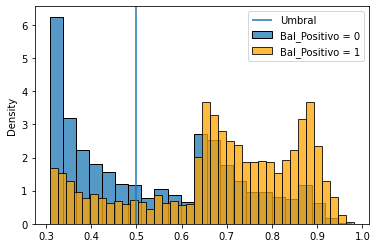

In [80]:
# Histograma de probabilidades
sns.histplot(data = mod7_gnb.predict_proba(X_test_num[y_test==0])[:,1], stat = 'density')
sns.histplot(data = mod7_gnb.predict_proba(X_test_num[y_test==1])[:,1], stat = 'density', color = 'orange')
ylim = plt.ylim()
plt.vlines(0.5, ylim[0], ylim[1])
plt.ylim(ylim)
plt.legend(['Umbral', 'Bal_Positivo = 0', 'Bal_Positivo = 1'])

*Las distribuciones de las predicciones de ambos datos no se encuentran lo suficientemente alejadas.*

In [81]:
y_predict_GNB = (y_pred_proba_mod7 > 0.68).astype(int)[:,1]

**Calculamos las métricas del modelo de Naive Bayes Mixto generado.**

Accuracy  Error_Classif  Recall  Specificity  \
GNB-OnlyNumFeatNOStd (Thr=0.68)      0.64           0.36    0.57         0.74   

                                 Precision  f1_score  
GNB-OnlyNumFeatNOStd (Thr=0.68)       0.79      0.67

Confusion Matrix


Text(0.5, 15.0, 'Predichos')

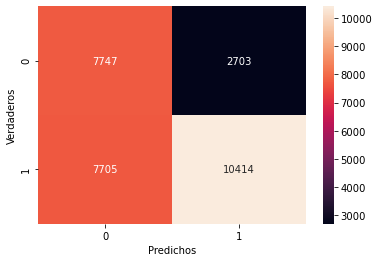

In [82]:
name_model = 'GNB-OnlyNumFeatNOStd (Thr=0.68)'
metrics = {}
metrics['Accuracy'] = round(accuracy_score(y_test, y_predict_GNB),2)
metrics['Error_Classif'] =  round(1 - metrics['Accuracy'],2)
metrics['Recall'] = round(recall_score(y_test, y_predict_GNB),2)
tn, fp, fn, tp = confusion_matrix(y_test, y_predict_GNB).ravel()
spc = tn/(tn+fp)
metrics['Specificity'] = round(spc,2)
metrics['Precision'] = round(precision_score(y_test, y_predict_GNB),2)
metrics['f1_score'] = round(f1_score(y_test, y_predict_GNB),2)
df_mod12nb = pd.DataFrame(metrics, index = [name_model])

display(df_mod12nb)

cm_LR = confusion_matrix(y_test, y_predict_GNB)
print('Confusion Matrix')
sns.heatmap(cm_LR, annot=True, fmt='4d')
plt.ylabel('Verdaderos')
plt.xlabel('Predichos')

In [83]:
df_filtro = pd.concat([df_mod11lr, df_mod12nb], axis=0)
df_filtro

Accuracy  Error_Classif  Recall  Specificity  \
LOGREG_Hyp_Met_Acc (Thr=0.68)        0.64           0.36    0.58         0.75   
GNB-OnlyNumFeatNOStd (Thr=0.68)      0.64           0.36    0.57         0.74   

                                 Precision  f1_score  
LOGREG_Hyp_Met_Acc (Thr=0.68)         0.80      0.68  
GNB-OnlyNumFeatNOStd (Thr=0.68)       0.79      0.67

**Podemos ver que en ambos modelos la precisión aumentó de 0.73 aprox hasta 0.79/0.80 aproximadamente, favoreciendo nuestro
**objetivo buscado de aumentar esta métrica**.

**DEBIDO AL MENOR COSTO COMPUTACIONAL Y A QUE PRÁCTICAMENTE AMBOS MODELOS TIENEN LA MISMA PERFORMANCE SOBRE EL SET DE DATOS,**

**SE ELIGE EL MODELO 11 GNB-OnlyNumFeatNOStd (Thr=0.68).**

<a id="section_datos_balanceados"></a> 
### 8. VERIFICACIÓN DE MODELO DE NAIVE BAYES GAUSSIANO EN DATASET BALANCEADO

**Se buscará simular una condición de negocio, donde la cantidad de casos con "Balance No Positivo" (ceros), debido a alguna externalidad, pudiera llegar a aumentar, lo cual tendería a balancear el Dataset. Para esto se simulará un Dataset de Datos Balanceados, apartir del cual tenemos y veremos el rendimiento del modelo seleccionado, en base a cómo se comportan las diferentes métricas. En este caso deberíamos observar en cuanto disminuye nuestra "Precisión", pero al estar el set de datos balanceado, deberíamos prestar atención a la "Accuracy". Esto se realizará para ver una condición extrema**

In [84]:
df.shape

(114276, 13)

In [85]:
df_bal_NoPos = df.loc[df['Bal_Positivo'] == 0]
df_bal_Pos = df.loc[df['Bal_Positivo'] == 1]
print(df_bal_NoPos.shape[0])
print(df_bal_Pos.shape[0])

41798
72478


In [86]:
df['Bal_Positivo'].value_counts(normalize=True)

1    0.634236
0    0.365764
Name: Bal_Positivo, dtype: float64

Podemos observar que tenemos mayor proporción de personas con Balance Positivo, **armamos un DFrame de 
manera aleatoria con la misma cantidad de casos Positivos como No Positivos, de manera de generar un Dataset
Balanceado.**

In [87]:
# Obtenemos un dataset balancedo con la clase que tiene menor cantidad de observaciones
df_balanced = pd.concat([df_bal_Pos.sample(n=41798, replace=False), df_bal_NoPos.sample(n=41798, replace=False)], axis=0)
df_balanced['Bal_Positivo'].value_counts(normalize=True)

1    0.5
0    0.5
Name: Bal_Positivo, dtype: float64

Haremos los mismos pasos que realizamos anteriormente para ver el rendimiento del Modelo de 
Regresión Logística en el Dataset Balanceado.
**Preparación de los Datos, generación de Matriz de Features y Vector Target.**

In [88]:
# SEPARAMOS LAS FEATURES CATEGÓRICAS DE LAS NUMÉRICAS
cat_features = ['descTipoAfiliado', 'DescripcionTipoVinculacion']
num_features = ['edadAfiliado', 'Aportes_2021', 'ibc_prom_2022']

In [89]:
# GENERAMOS EL DF CON LAS VAR CATEGÓRICAS Y CHEQUEAMOS SUS DIMENSIONES
X_catB = df_balanced[cat_features]
print(X_catB.shape)
# GENERAMOS LAS VARIABLES DUMMIES
X_dummiesB = pd.get_dummies(X_catB, drop_first=True)
print(X_dummiesB.shape)

(83596, 2)
(83596, 5)


In [90]:
X_dummiesB.isnull().sum()

descTipoAfiliado_INDEPENDIENTE                    0
descTipoAfiliado_MIXTO                            0
descTipoAfiliado_VOLUNTARIO                       0
DescripcionTipoVinculacion_TRASLADO DE RÉGIMEN    0
DescripcionTipoVinculacion_VINCULACION INICIAL    0
dtype: int64

In [91]:
#GENERAMOS DF DE FEATURES Y VECTOR DE TARGET
X_b = pd.concat([df_balanced[num_features], X_dummiesB], axis=1)
y_b = df_balanced['Bal_Positivo']
print(X_b.shape)
print(y_b.shape)

(83596, 8)
(83596,)


In [92]:
y_b.isnull().sum()

0

**Realizamos un Split de los datos.**

In [93]:
X_trainB, X_testB, y_trainB, y_testB = train_test_split(X_b, y_b, stratify=y_b, random_state=42)
print(X_trainB.shape)
print(X_testB.shape)
print(y_trainB.shape)
print(y_testB.shape)

(62697, 8)
(20899, 8)
(62697,)
(20899,)


In [94]:
#CHEQUEAMOS COMO SE ENCUENTRAN DISTRIBUIDAS LAS CLASES DE LA VAR TARGET EN EL DATASET, CHEQUEAMOS QUE DICHA 
#DISTRIBUCIÓN SE MANTENGA EN LOS SETS DE TRAIN Y TEST
print(y_b.value_counts(normalize=True))
print(y_trainB.value_counts(normalize=True))
print(y_testB.value_counts(normalize=True))

1    0.5
0    0.5
Name: Bal_Positivo, dtype: float64
1    0.500008
0    0.499992
Name: Bal_Positivo, dtype: float64
0    0.500024
1    0.499976
Name: Bal_Positivo, dtype: float64


**Estandarizamos los datos**

In [95]:
X_trainB = X_trainB.reset_index(drop=True)
X_testB = X_testB.reset_index(drop=True)
y_trainB = y_trainB.reset_index(drop=True)
y_testB = y_testB.reset_index(drop=True)

print(X_trainB.shape)
print(X_testB.shape)
print(y_trainB.shape)
print(y_testB.shape)

(62697, 8)
(20899, 8)
(62697,)
(20899,)


In [96]:
cols = ['edadAfiliado', 'Aportes_2021', 'ibc_prom_2022']
x_train_stdB = pd.DataFrame(scaler.fit_transform(X_trainB[cols]), columns=cols) #Escalamos las cols seleccionadas
X_train_origB = X_trainB
X_trainB = X_trainB.drop(cols, axis=1) # Borramos las cols seleccionadas del X_train
X_train_stdB = pd.concat([x_train_stdB, X_trainB], axis=1) # Hacemos concat de datos escalados con el resto de X_train

In [97]:
x_test_stdB = pd.DataFrame(scaler.transform(X_testB[cols]), columns=cols) #Escalamos las cols seleccionadas
X_test_origB = X_testB
X_testB = X_testB.drop(cols, axis=1) # Borramos las cols seleccionadas del X_test
X_test_stdB = pd.concat([x_test_stdB, X_testB], axis=1) # Hacemos concat de datos escalados con el resto de X_train

In [98]:
print(X_train_stdB.shape)
print(X_test_stdB.shape)
print(y_trainB.shape)
print(y_testB.shape)

(62697, 8)
(20899, 8)
(62697,)
(20899,)


In [99]:
X_train_origB_num = X_train_origB.loc[:,['edadAfiliado', 'Aportes_2021', 'ibc_prom_2022']]
X_test_origB_num = X_test_origB.loc[:,['edadAfiliado', 'Aportes_2021', 'ibc_prom_2022']]

In [100]:
mod12_gnb = GaussianNB()

Accuracy  Error_Classif  Recall  \
GNB-OnlyNumFeatNOStd EN DATASET BALANCEADO      0.66           0.34    0.72   

                                            Specificity  Precision  f1_score  \
GNB-OnlyNumFeatNOStd EN DATASET BALANCEADO          0.6       0.64      0.68   

                                              AUC  
GNB-OnlyNumFeatNOStd EN DATASET BALANCEADO  0.713

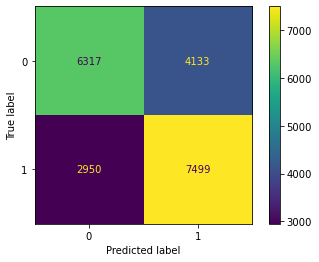

In [101]:
y_pred_proba_mod12GNB, df_mod12gnb = fit_get_metrics(mod12_gnb, X_train_origB_num, X_test_origB_num, 
                                                 y_trainB, y_testB, 'GNB-OnlyNumFeatNOStd EN DATASET BALANCEADO')

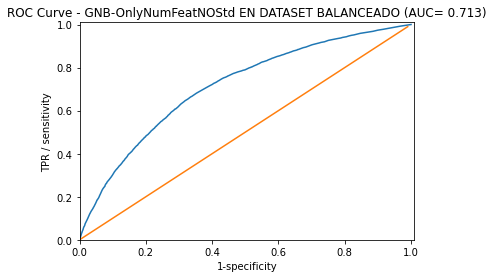

In [102]:
rocm12GNB = get_roc_auc(y_testB, y_pred_proba_mod12GNB, 'GNB-OnlyNumFeatNOStd EN DATASET BALANCEADO')

**Podemos observar que al tratarse ahora de un caso balanceado de datos, tanto la "Accuracy", como la "Precision", arrojan valores aceptables
y por encima de la proporción de casos positivos (0.5), lo cual quiere decir que el modelo aún sigue aportando poder predictivo.**

<a id="section_conclusiones"></a> 
### 9. CONCLUSIONES

***- Gran parte del trabajo estuvo influida por la limpieza del dataset. La misma se realizó de 
manera iterativa, tratando de buscar mayor cantidad de variables descriptivas que aportaran al
modelo de regresión lineal y eliminando outliers y data que no aportan información al mismo.***

***- Como resultado del punto anterior se evaluó utilizar variables categóricas en varios modelos,
las cuales luego resultaron irrelevantes o con poco aporte hacia los mismos.***

***- El apartado que se refiere a Labelling (Generación de Etiquetas en base a diferentes condiciones) influye principalmente en la distribución de los datos, y es condición necesaria tener un conocimiento profundo del negocio al momento de realizar dicha etapa, lo cual podría influir en nuestro análisis, introduciendo un cierto sesgo al mismo que no represente del todo a la realidad. Como punto de mejora se propone generar diferentes escenarios, en base a la prueba de diferentes condiciones en la generación de las Labels, de manera de ver cómo responden los modelos en los diferentes casos.***

***- Al cambiar los umbrales de los modelos seleccionados, se puede observar que las distribuciones de los datos predichos 
no se encuentran lo suficientemente alejadas, por lo cual los rendimientos de los modelos generados, no llegan a ser suficientemente elevados.*** 

***- Se destaca la importancia de realizar Cross Validation para realizar el "tunning" de los diferentes hiperparámetros de los modelos que lo requieren.***